## Modules

In [2]:
import os
from tqdm import tqdm

import numpy as np
from scipy.signal import find_peaks, correlate, butter, sosfilt, freqs
from scipy.ndimage import gaussian_filter, median_filter
from scipy.stats import sem
from signal_analysis import SignalAnalysis

import seaborn as sns
import seaborn_image as isns
import cmcrameri.cm as cmc
from matplotlib import pyplot as plt


cmap = 'cmc.batlow'
# sns.set_palette(cmap)

## Open data

In [16]:
pathBase = r"C:\Users\gabri\Desktop\testAnalyse\2024_07_18"

green = np.loadtxt(pathBase + "\\csv\\530.csv", skiprows=1, delimiter=',')[:,1]
violet = np.loadtxt(pathBase + "\\csv\\405.csv", skiprows=1, delimiter=',')[:,1]
blue = np.loadtxt(pathBase + "\\csv\\470.csv", skiprows=1, delimiter=',')[:,1]

green_t = np.load(pathBase + "\\530ts.npy")
violet_t = np.load(pathBase + "\\405ts.npy")
blue_t = np.load(pathBase + "\\470ts.npy")

## AP time series

In [12]:
FPS = 50
AP_idx = []
nChannels=5
AP_begin = 5
percycle=15
FPSc = FPS/nChannels
framespcycles = int(FPSc*percycle)
ncycles = int(len(violet_t)//framespcycles)
AP_times = np.array(list(range(ncycles)))*15+5

for ti in AP_times:
    AP_idx.append(np.argmin(np.absolute(violet_t-ti)))

# Dirac où AP dans times series
AP_series = np.zeros(len(violet_t))
AP_series[AP_idx] = 1

## Plot rapide

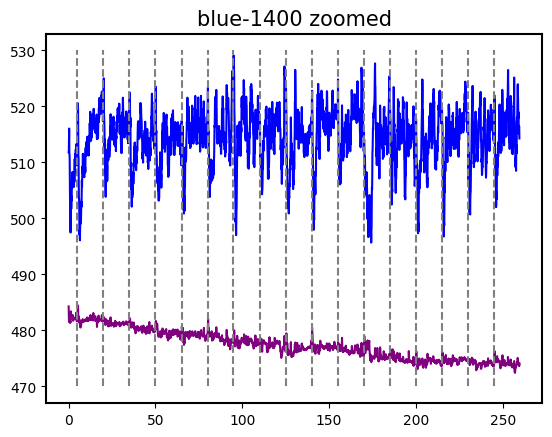

In [43]:
# plt.plot(green_t, green+200, 'g-')
plt.plot(blue_t, blue-1400, 'b-')
plt.plot(violet_t, violet, color='purple')
plt.title('blue-1400 zoomed')
plt.vlines(violet_t[AP_idx], 470, 530, colors='grey', linestyles='--')
# plt.xlim(0, 100)
# plt.savefig('blue-1400zoomed.png', dpi=600)

In [21]:
def normalizeData(data:list, dim:int=3) -> list:
    """_summary_

    Args:
        data (list): _description_
        dim (int, optional): dimension of data. Defaults to 3.

    Returns:
        list: _description_
    """
    datamin = np.min(data, axis=dim-1)[..., np.newaxis]
    datamax = np.max(data - datamin, axis=dim-1)[..., np.newaxis]
    datamax[np.where(datamax == 0)] = 1
    return ((data - datamin)/(datamax))

Text(0.5, 1.0, 'normalized to compare')

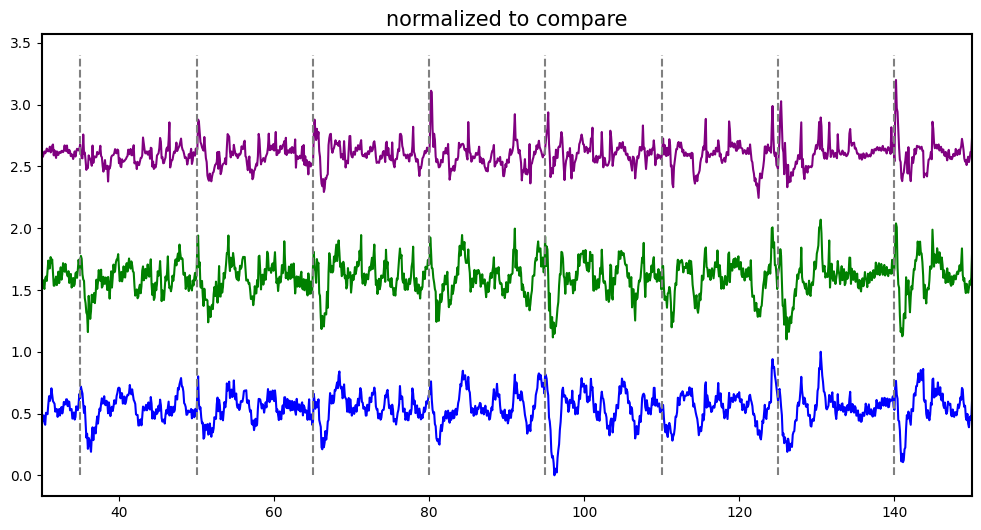

In [53]:
f = 0.1
sos = butter(1, f, 'high', output='sos', fs=10)
green_f = sosfilt(sos, green)
blue_f = sosfilt(sos, blue)
violet_f = sosfilt(sos, violet)
i = 100

green_n = normalizeData(green_f[i:], dim=1)
blue_n = normalizeData(blue_f[i:], dim=1)
violet_n = normalizeData(violet_f[i:], dim=1)
fig = plt.figure(figsize=(12, 6))
# plt.plot(blue_t[i:], (blue_n/green_n)+3.3)
# plt.plot(blue_t[i:], (blue_n-violet_n[:-1])+3.3)
plt.plot(violet_t[i:], violet_n+2.2, color='purple')
plt.plot(green_t[i:], green_n+1.1, 'g-')
plt.plot(blue_t[i:], blue_n, 'b-')
plt.vlines(violet_t[AP_idx], 0, 3.4, colors='grey', linestyles='--')
plt.xlim(30, 150)
# plt.ylim(0, 6)
plt.title('normalized to compare')
# plt.savefig('normalized_gcamp.png', dpi=600)

